In [1]:
from builtins import list
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import plot_confusion_matrix
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV





In [15]:
#Load data
data = pd.read_csv(r'C:\Users\OWNER\Downloads\player-classification (1).csv')
test_data=pd.read_csv(r'C:\Users\OWNER\OneDrive\Desktop\Player Value Prediction\player-tas-classification-test.csv')

#data describe 
print(data.info())
print(test_data.info())
#Preprocessing:
#first:null values
#drop columns with many null values(more than 50%)
data.drop(columns=['national_team', 'national_rating'
    , 'national_team_position', 'national_jersey_number'
    , 'tags', 'traits'], inplace=True)
test_data.drop(columns=['national_team', 'national_rating'
    , 'national_team_position', 'national_jersey_number'
    , 'tags', 'traits'], inplace=True)
#fill null values with mean or mode for catigorical data
for i in data.columns:
    if(data[i].dtypes== object ):
        data[i].fillna(data[i].mode()[0],inplace=True)
    else:
        data[i].fillna(data[i].mean(),inplace=True)

for i in test_data.columns:
    if(test_data[i].dtypes== object ):
        test_data[i].fillna(test_data[i].mode()[0],inplace=True)
    else:
        test_data[i].fillna(test_data[i].mean(),inplace=True)
    
#drop id,name,fullname,birthdate columns
data.drop(columns=['id','name','full_name','birth_date'], inplace=True)
test_data.drop(columns=['id','name','full_name','birth_date'], inplace=True)


#Feature Encoder
def Feature_Encoder(X, cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X
cols = ('nationality', 'positions', 'preferred_foot', 'work_rate',
        'body_type', 'club_team', 'club_position',  'club_join_date',                
          'contract_end_year','PlayerLevel')              
        
data=Feature_Encoder(data,cols) 
test_data=Feature_Encoder(test_data,cols) 
for j in ["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM",
          "LM", "LCM", "CM", 'RCM', "RM", "LDM", "CDM", "RDM", "RWB",
          "LB", "LCB", "CB", "RCB", "RB", "LWB",]:
    for i in range(0, len(data)):
        z = data[j]
        if (type(z[i]) == str):
            z[i] = z[i].split("+")[0]
            z[i] = int((z[i]))
for j in ["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM",
          "LM", "LCM", "CM", 'RCM', "RM", "LDM", "CDM", "RDM", "RWB",
          "LB", "LCB", "CB", "RCB", "RB", "LWB",]:
    for i in range(0, len(test_data)):
        z = test_data[j]
        if (type(z[i]) == str):
            z[i] = z[i].split("+")[0]
            z[i] = int((z[i]))
            
#feature selection
Y=data['PlayerLevel']
X=data.drop(['PlayerLevel'],axis=1)
testY=test_data['PlayerLevel']
testX=test_data.drop(['PlayerLevel'],axis=1)
uni = SelectKBest(score_func = f_classif, k = 10)
uni2 = SelectKBest(score_func = f_classif, k = 10)
fit=uni.fit(X, Y)
fit_test=uni2.fit(testX, testY)
top_features=X.columns[fit.get_support(indices=True)].tolist()
top_features2=testX.columns[fit.get_support(indices=True)].tolist()
X=data[top_features]
testX=test_data[top_features2]
print(testX.columns)
print(X.columns)

#feature scaling
def featureScaling(X, a, b):
    X = np.array(X)
    Normalized_X = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        Normalized_X[:, i] = ((X[:, i] - min(X[:, i])) / (max(X[:, i]) - min(X[:, i]))) * (b - a) + a
    return Normalized_X
X= featureScaling(X, 0 , 1)
testX=featureScaling(testX, 0 , 1)
#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=700)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.90,shuffle=True , random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14363 entries, 0 to 14362
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             14363 non-null  int64  
 1   name                           14363 non-null  object 
 2   full_name                      14363 non-null  object 
 3   birth_date                     14363 non-null  object 
 4   age                            14363 non-null  int64  
 5   height_cm                      14363 non-null  float64
 6   weight_kgs                     14363 non-null  float64
 7   positions                      14363 non-null  object 
 8   nationality                    14363 non-null  object 
 9   overall_rating                 14363 non-null  int64  
 10  potential                      14363 non-null  int64  
 11  wage                           14172 non-null  float64
 12  preferred_foot                 14363 non-null 

Index(['overall_rating', 'potential', 'release_clause_euro', 'club_rating',
       'reactions', 'composure', 'LCM', 'CM', 'RCM', 'RM'],
      dtype='object')
Index(['overall_rating', 'potential', 'release_clause_euro', 'club_rating',
       'reactions', 'composure', 'LCM', 'CM', 'RCM', 'RM'],
      dtype='object')


Accuracy= 79.09407665505228
test Accuracy= 76.34408602150538


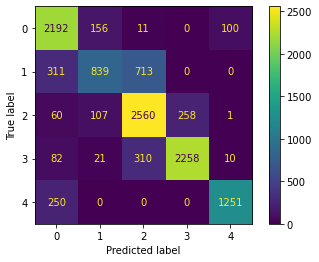

In [3]:
#Modeling:
#logistic regression without hyperparameter tuning
LR = LogisticRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =LR.predict(X_test)
testacc=LR.predict(testX)
print('Accuracy=',accuracy_score(y_test,y_prediction )*100)
print('test Accuracy=',accuracy_score(testY,testacc )*100)
plot_confusion_matrix(LR ,X_train,y_train)

plt.show()




Test Accuracy=  77.475947934352
Accuracy=  86.06271777003485
Logistic regression best parameters:  LogisticRegression(C=100.0, solver='newton-cg')


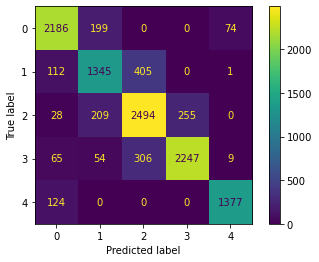

In [4]:
#logistic regression with hyperprameter tuning

#parameter grid

#parameters = {
    #'penalty' : ['l1','l2','elasticnet'], 
    #'C'       : np.logspace(-3,3,7),
    #'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
#}

#logreg = LogisticRegression()
#clf = GridSearchCV(logreg,                    # model
                  #param_grid = parameters,   # hyperparameters
                   #scoring='accuracy',        # metric for scoring
                   #cv=10,refit = True)                     # number of folds
#lg_start_time=time.time()
#clf.fit(X_train, y_train)
#lg_end_time=time.time()
#Lg_training_time=lg_end_time-lg_start_time
#pick=open('Logistic regression.pickle','wb')
#pickle.dump(clf,pick)
#pick.close()
pick=open('logistic regression model.pickle','rb')
model=pickle.load(pick)
pick.close()
Lg_predictions = model.predict(X_test)
lg_start_time=time.time()
Lg_predictions2 = model.predict(testX)
lg_end_time=time.time()
Lg_testing_time=lg_end_time-lg_start_time
Lg_acc=accuracy_score(y_test,Lg_predictions)*100
Lg_test_acc=accuracy_score(testY,Lg_predictions2)*100
print("Test Accuracy= ",Lg_test_acc)
print("Accuracy= ",Lg_acc)
print('Logistic regression best parameters: ',model.best_estimator_)
plot_confusion_matrix(model ,  X_train,y_train)  
plt.show()


Accuracy= 89.54703832752612
test Accuracy= 83.07866440294283


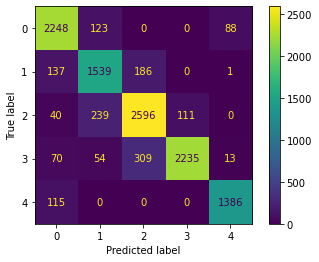

In [5]:
#SVM without hyperprameter tuning
model2 = SVC()
model2.fit(X_train, y_train)
# print prediction results
predictions = model2.predict(X_test)
test_predictions = model2.predict(testX)
print("Accuracy=",accuracy_score(y_test,predictions)*100)
print("test Accuracy=",accuracy_score(testY,test_predictions)*100)
plot_confusion_matrix(model2 ,  X_train,y_train)  
plt.show()



Accuracy=  91.28919860627178
Test Accuracy=  83.64459535936616
SVM best parameters:  SVC(C=1000, gamma=1)


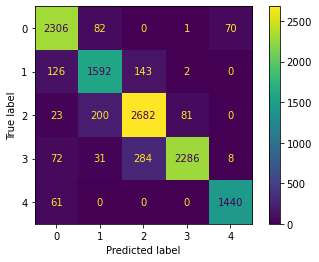

In [6]:
#SVM with hyperprameter tuning


# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#'kernel': ['rbf','linear','poly']}

#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
#svm_start_time=time.time()
#grid.fit(X_train, y_train)
#svm_end_time=time.time()
#svm_training_time=svm_end_time-svm_start_time
#pick=open('SVM.pickle','wb')
#pickle.dump(grid,pick)
#pick.close()
pick=open('SVM.pickle','rb')
grid_model=pickle.load(pick)
pick.close()
grid_predictions = grid_model.predict(X_test)
svm_start_time=time.time()
test_predictions=grid_model.predict(testX)
svm_end_time=time.time()
svm_testing_time=svm_end_time-svm_start_time
SVM_acc=accuracy_score(y_test,grid_predictions)*100
SVM_test_acc=accuracy_score(testY,test_predictions)*100
#print classification report
print("Accuracy= ",SVM_acc)
print("Test Accuracy= ",SVM_test_acc)
print('SVM best parameters: ',grid_model.best_estimator_)
plot_confusion_matrix(grid_model ,  X_train,y_train)  
plt.show()


Accuracy=  91.63763066202091
Test Accuracy=  84.01245048104131


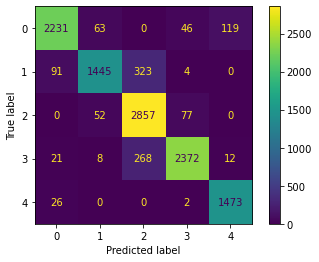

In [7]:
#Decision tree without hyperprameter tuning
#with adaboosting
dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),algorithm='SAMME',n_estimators=200)
dt.fit(X_train, y_train)
predictions=dt.predict( X_test)
test_predictions=dt.predict(testX)
print('Accuracy= ',accuracy_score(y_test,predictions)*100)
print('Test Accuracy= ',accuracy_score(testY,test_predictions)*100)
plot_confusion_matrix(dt ,  X_train,y_train)  
plt.show()



Accuracy=  93.72822299651567
test Accuracy=  86.07809847198642
Decision tree best parameters:  DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)


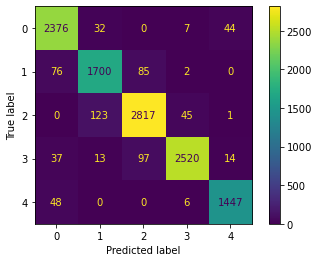

In [8]:
#decision tree with hyperprameter tuning
#dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
#params = {
    #'max_depth': [2, 3, 5, 10, 20],
    #'min_samples_leaf': [5, 10, 20, 50, 100],
    #'criterion': ["gini", "entropy", "log_loss"]
    
#}

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy",refit = True)
#dt_start_time=time.time()
#grid_search.fit(X_train, y_train)
#dt_end_time=time.time()
#dt_training_time=dt_end_time-dt_start_time
#pick=open('decisiontree.pickle','wb')
#pickle.dump(grid_search,pick)
#pick.close()
pick=open('decisiontree.pickle','rb')
DtModel=pickle.load(pick)
pick.close()
DT_predictions=DtModel.predict(X_test)
dt_start_time=time.time()
DT_test_predictions=DtModel.predict(testX)
dt_end_time=time.time()
dt_testing_time=dt_end_time-dt_start_time
DT_acc=accuracy_score(y_test,DT_predictions)*100
DT_test_acc=accuracy_score(testY,DT_test_predictions)*100
print("Accuracy= ",DT_acc)
print("test Accuracy= ",DT_test_acc)
print('Decision tree best parameters: ',DtModel.best_estimator_)
plot_confusion_matrix(DtModel ,  X_train,y_train)  
plt.show()



94.77351916376307


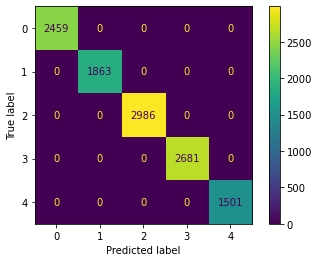

In [9]:
#random forest without hyperparameter tuning
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(accuracy_score(y_test,preds)*100)
plot_confusion_matrix(clf ,  X_train,y_train)  
plt.show()

94.07665505226481


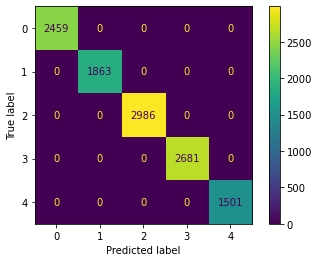

In [10]:
#random forest with hyperparameter tuning

#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#t0=time.time()
#rf_random.fit( X_train,y_train)
#t1=time.time()
#rftime=t1-t0
#pick=open('randomforest.pickle','wb')
#pickle.dump(rf_random,pick)
#pick.close()
pick=open('randomforest.pickle','rb')
rfModel=pickle.load(pick)
pick.close()
t0=time.time()
y_pred = rfModel.predict(X_test)
t1=time.time()
rf_testing_time=t1-t0
rfaccuracy = metrics.accuracy_score(y_test, y_pred)*100
print (rfaccuracy)
plot_confusion_matrix(rfModel ,  X_train,y_train)  
plt.show()

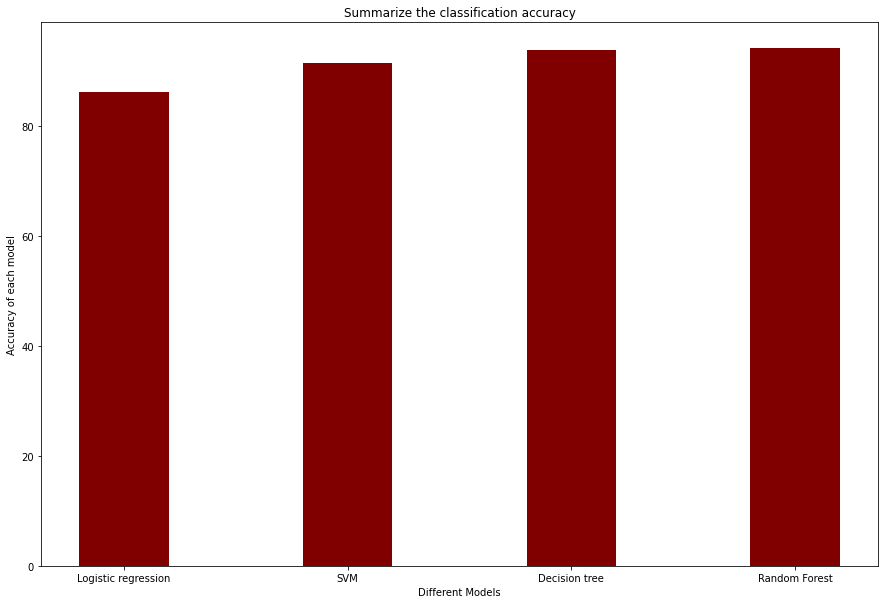

In [11]:


#summarize classification accuracy using bar graph
thisdict = {
  "Logistic regression": Lg_acc,
  "SVM": SVM_acc,
  "Decision tree": DT_acc,
  "Random Forest": rfaccuracy 
}
Models = list(thisdict.keys())
Accuracy = list(thisdict.values())
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(Models, Accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Different Models")
plt.ylabel("Accuracy of each model")
plt.title("Summarize the classification accuracy")
plt.show()